## This notebook providtes an exploration of using Geweke or Rubin's tests for MCMC software

This notebook uses Random Walk Metropolis targeting a the posterior of a logistic model with normal noise

In [117]:
import os
os.chdir("..")
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = np.array([0.015, 500])
times = np.linspace(0, 1000, 10)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function
log_likelihood = pints.KnownNoiseLogLikelihood(problem, noise)

# Create a uniform prior over the parameters
log_prior = pints.UniformLogPrior(
    [0.01, 400],
    [0.02, 600]
)

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Choose starting points for 3 mcmc chains
xs = [
    real_parameters * 1.1,
    real_parameters * 0.9,
    real_parameters * 1.15,
]

# Choose a covariance matrix for the proposal step
sigma0 = [0.015 * 5e-4, 1]

# Create mcmc routine
mcmc = pints.MetropolisRandomWalkMCMC(real_parameters * 1.1, sigma0)

### Geweke method

In [137]:
n = 40000
theta = np.zeros((n, 2))
y = np.zeros((n, len(values)))
for i in range(n):
    org_values = model.simulate(params, times)
    values1= org_values + np.random.normal(0, noise, org_values.shape)
    log_posterior.log_likelihood()._values = values1
    log_posterior.log_likelihood()._problem._values = values1
    params = mcmc.ask()
    params = mcmc.tell(log_posterior(params))
    theta[i, :] = params
    y[i, :] = values1

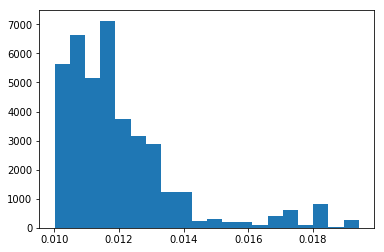

In [138]:
plt.hist(theta[:, 0],20)
plt.show()

In [136]:
org_values

array([   2.        ,    6.52298684,   20.91482385,   63.63483107,
        168.1254226 ,  336.00257214,  482.64163352,  556.54692811,
        583.74516547,  592.55637104])